# Tugas Kecil 1: Eksplorasi scikit-learn untuk Clustering pada Jupyter Notebook

Oleh: 13515107 - Roland Hartanto

## Overview
1. Load Package Python  
2. Pembacaan Dataset Training  
   2.1 Dataset Iris  
   2.2 Dataset Play Tennis  
3. Clustering  
   3.1 Clustering Dataset Iris  
       3.1.1 K-means  
       3.1.2 Agglomerative Clustering  
       3.1.3 DBSCAN  
       3.1.4 Gaussian Mixture  
       3.1.5 K-medoids  
       3.1.6 Graph Clustering  
       3.1.7 Grid Clustering (BANG clustering)  
       3.1.8 Penyimpanan dan Pembacaan Model/Hipotesis pada File Eksternal  
       3.1.9 Assignment Cluster Instance Baru dengan Model dari File Eksternal  
   3.2 Clustering Dataset Play Tennis  
       3.1.1 K-means  
       3.1.2 Agglomerative Clustering  
       3.1.3 DBSCAN  
       3.1.4 Gaussian Mixture  
       3.1.5 K-medoids  
       3.1.6 Graph Clustering  
       3.1.7 Grid Clustering (BANG clustering)  
       3.1.8 Penyimpanan dan Pembacaan Model/Hipotesis pada File Eksternal  
       3.1.9 Assignment Cluster Instance Baru dengan Model dari File Eksternal  
4. Sumber  

## 1. Load Package Python

In [1]:
# Untuk analisis dan mengolah data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Untuk pembelajaran
from sklearn import metrics
from sklearn import datasets, linear_model, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.bang import bang

from mst_clustering import MSTClustering

# Untuk menyimpan/membaca model/hipotesis
import joblib
import dill

# Lain-lain
from copy import deepcopy

## 2. Pembacaan Dataset Training

### 2.1 Dataset Iris

In [2]:
# load iris dataset
iris_dataset = datasets.load_iris()

print("Number of instances:", len(iris_dataset['data']))
print("Feature names:", iris_dataset['feature_names'])
print()

# print a few samples
print("Sample (10):")
iris_dataset['data'][:10]

Number of instances: 150
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Sample (10):


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

### 2.2 Dataset Play Tennis

In [3]:
# load tenis dataset
tenis_dataset = pd.read_csv("tennis.csv")
tenis_dataset

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


*Dataset play tennis* memiliki *instance* dengan nilai atribut berupa *string* dan *boolean* yang dapat diuraikan sebagai berikut.  
**Atribut 1 - Outlook (string):** {0: rainy, 1: overcast, 2: sunny}  
**Atribut 2 - Temp (string):** {0: cool, 1: mild, 2: hot}  
**Atribut 3 - Humidity (string):** {0: normal, 1: high}  
**Atribut 4 - Windy (boolean):** {0: False, 1: True}  
<br>
Oleh sebab itu, diperlukan *preprocessing* pada *dataset play tennis* menjadi data yang numerik.

In [4]:
# Preprocess Play Tennis Dataset (convert to numeric data)
# make backup data
tenis_data_instances = deepcopy(tenis_dataset)
# delete class attribute
del tenis_data_instances['play']

# change attribute value to numeric
tenis_data_instances.outlook.replace(to_replace=['rainy', 'overcast', 'sunny'],value=[0, 1, 2], inplace=True)
tenis_data_instances.temp.replace(to_replace=['cool', 'mild', 'hot'],value=[0, 1, 2], inplace=True)
tenis_data_instances.humidity.replace(to_replace=['normal', 'high'],value=[0, 1], inplace=True)
tenis_data_instances.windy.replace(to_replace=[False, True],value=[0, 1], inplace=True)

print("Preprocessed dataset:")
print(tenis_data_instances)
print()

# convert dataframe to list
tenis_data_list = [[0, 0, 0, 0] for i in range(0,14)]
for i in range(0,14):
    tenis_data_list[i][0] = tenis_data_instances.outlook[i]
    tenis_data_list[i][1] = tenis_data_instances.temp[i]
    tenis_data_list[i][2] = tenis_data_instances.humidity[i]
    tenis_data_list[i][3] = tenis_data_instances.windy[i]

tenis_data_nparray = np.array(tenis_data_list)
print("Converted dataset:")
print(tenis_data_nparray)

Preprocessed dataset:
    outlook  temp  humidity  windy
0         2     2         1      0
1         2     2         1      1
2         1     2         1      0
3         0     1         1      0
4         0     0         0      0
5         0     0         0      1
6         1     0         0      1
7         2     1         1      0
8         2     0         0      0
9         0     1         0      0
10        2     1         0      1
11        1     1         1      1
12        1     2         0      0
13        0     1         1      1

Converted dataset:
[[2 2 1 0]
 [2 2 1 1]
 [1 2 1 0]
 [0 1 1 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 1]
 [2 1 1 0]
 [2 0 0 0]
 [0 1 0 0]
 [2 1 0 1]
 [1 1 1 1]
 [1 2 0 0]
 [0 1 1 1]]


## 3. Clustering
### 3.1 Clustering Dataset Iris

#### 3.1.1 K-Means

In [5]:
# fungsi untuk plot hasil clustering
play_tennis_attributes = ['outlook {0: rainy, 1: overcast, 2: sunny}', 'temp {0: cool, 1: mild, 2: hot} ', 
                                  'humidity {0: normal, 1: high}', 'windy {0: False, 1: True}']
def setLabelAndTitle(i, j, is_tennis=False):
    if(is_tennis):
        plt.title('Play Tennis Dataset Clustering Result - ' 
                      + play_tennis_attributes[i] + ' ' + play_tennis_attributes[j])
        plt.xlabel(play_tennis_attributes[i])
        plt.ylabel(play_tennis_attributes[j])
    else:
        plt.title('Iris Dataset Clustering Result - ' 
                      + iris_dataset['feature_names'][i] + ' ' + iris_dataset['feature_names'][j])
        plt.xlabel(iris_dataset['feature_names'][i])
        plt.ylabel(iris_dataset['feature_names'][j])

def plotClusteringResult(clustering_result, with_centroid, is_tennis=False):
    for i in range(0, 3):
        for j in range(i+1, 4):
            setLabelAndTitle(i, j, is_tennis)
            plt.scatter(x[clustering_result == 0, i], x[clustering_result == 0, j], s = 100, c = 'red', label = '0')
            plt.scatter(x[clustering_result == 1, i], x[clustering_result == 1, j], s = 100, c = 'blue', label = '1')
            if(not is_tennis):
                plt.scatter(x[clustering_result == 2, i], x[clustering_result == 2, j], s = 100, c = 'green', label = '2')

            if (with_centroid):
                plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], 
                            s = 100, c = 'yellow', label = 'Centroids')
            plt.legend()
            plt.show()

**Keterangan parameter penting yang bisa digunakan:**
- **n_clusters** : jumlah cluster yang diinginkan; nilai default=8
- **init** : cara menginisialisasi centroid awal (seed); nilai default='k-means++'  
  nilai-nilai: **ditentukan manual, random, k-means++** (inisialisasi centroid dengan 'cerdas' untuk mempercepat konvergen, berdasarakan Arthur, D. and Vassilvitskii, S. "k-means++: the advantages of careful seeding". ACM-SIAM symposium on Discrete algorithms. 2007)
- **n_init** : jumlah pengulangan clustering k-means yang dilakukan (dengan seed yang berbeda) untuk memaksimalkan hasil clustering (squared error paling minimum)
- **max_iter** : jumlah iterasi maksimum; nilai default=300
- **tol** : toleransi terhadap squared error untuk menentukan konvergensi; nilai default=0.0001

Clustering result:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


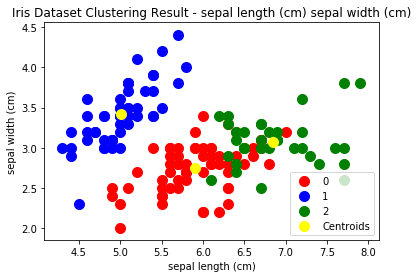

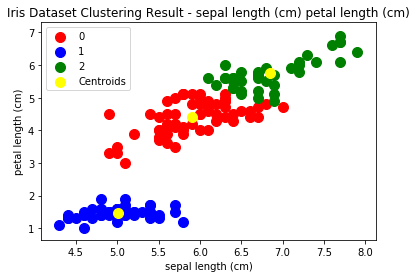

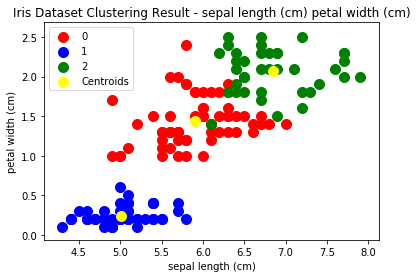

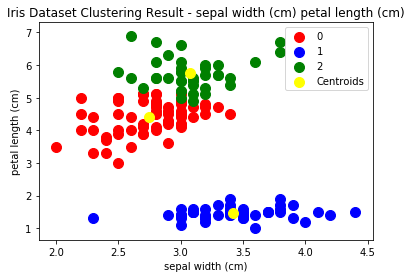

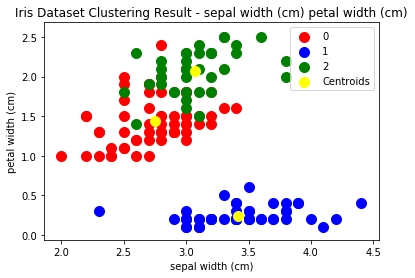

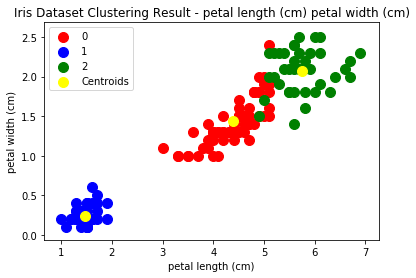

In [6]:
# K-Means
x = iris_dataset['data']
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clustering_result = kmeans.fit_predict(x)
print("Clustering result:")
print(clustering_result)

#Plotting the centroids of the clusters
plotClusteringResult(clustering_result, 1)

#### 3.1.2 Agglomerative Clustering

**Keterangan parameter penting yang dapat digunakan:**
- **n_clusters** : jumlah cluster yang diinginkan
- **affinity** : metode yang digunakan untuk menghitung jarak linkage; default = euclidean
- **linkage** : jenis linkage yang digunakan **(ward/complete/single/average)**; default = 'ward'  
  untuk jenis linkage ward, jenis affinity yang dapat dipilih hanya euclidean

Clustering result:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


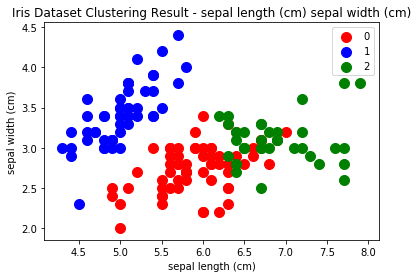

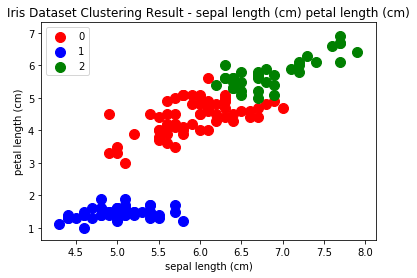

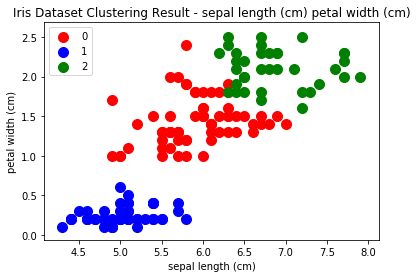

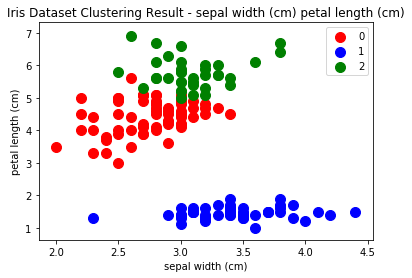

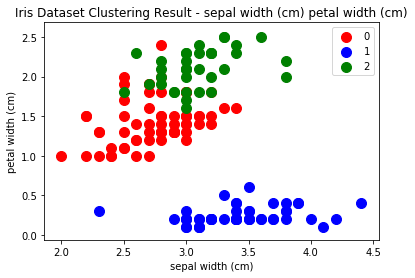

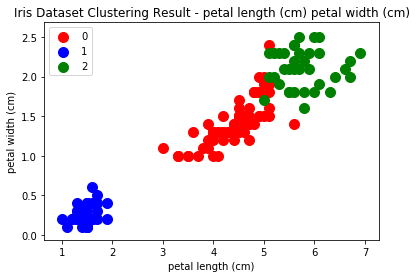

In [7]:
agglomerative = AgglomerativeClustering(n_clusters = 3)
agglomerative.fit(x)
clustering_result = agglomerative.fit_predict(x)
print("Clustering result:")
print(clustering_result)

plotClusteringResult(clustering_result, 0)

#### 3.1.3 DBSCAN

**Keterangan parameter penting yang dapat digunakan:**
- **eps** : epsilon
- **min_samples** : minimum poin sampel
- **metric** : cara menghitung jarak antar poin sampel

In [8]:
# Plot result
# modified from http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
def plotDBSCAN(i, j, is_tennis=False):
    setLabelAndTitle(i, j, is_tennis)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        
        # Core point
        xy = x[class_member_mask & core_samples_mask]
        plt.plot(xy[:, i], xy[:, j], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=str(k))
        # Not core point
        xy = x[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, i], xy[:, j], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    
    plt.legend()
    plt.show()

eps = 0.5; min_samples = 12
Number of clusters: 3
Clustering result:
black(-1): outliers
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  2  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1 -1  2  2 -1 -1 -1 -1 -1  2  2  2 -1 -1  2  2 -1 -1 -1  2 -1 -1  1  2
 -1  1  1  2 -1 -1 -1  2  1 -1 -1 -1  2  1  2  2  2  1  2 -1  2  1  2 -1  1]


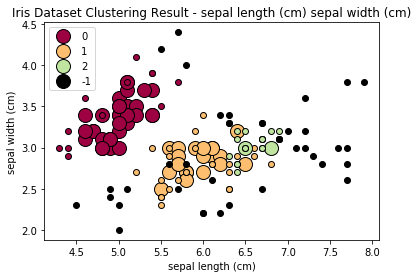

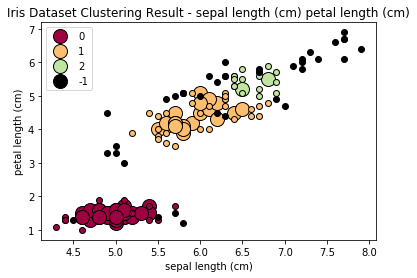

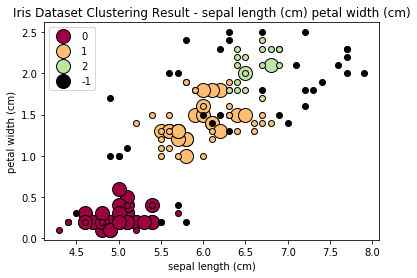

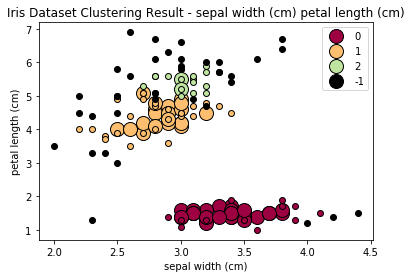

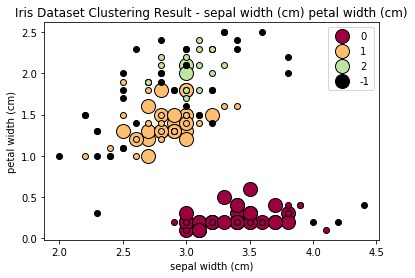

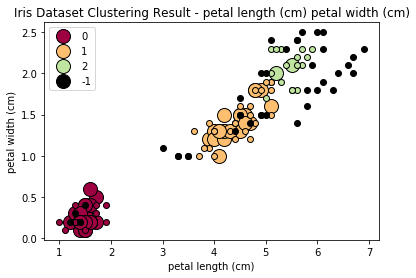

eps = 0.5; min_samples = 13
Number of clusters: 3
Clustering result:
black(-1): outliers
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  2  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1 -1  2  2 -1 -1 -1 -1 -1  2  2  2 -1 -1  2  2 -1 -1 -1  2 -1 -1  1  2
 -1  1  1  2 -1 -1 -1  2  1 -1 -1 -1  2  1  2  2  2  1  2 -1  2 -1  2 -1  1]


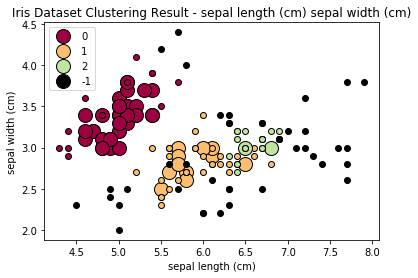

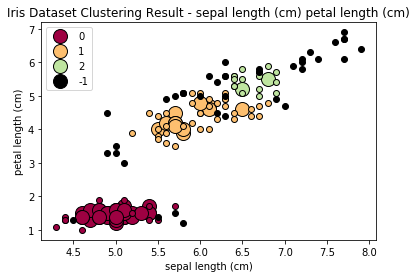

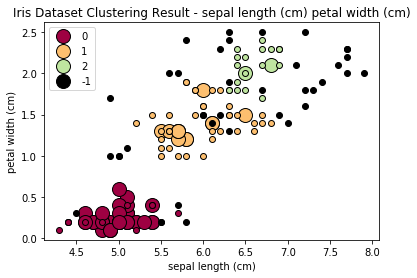

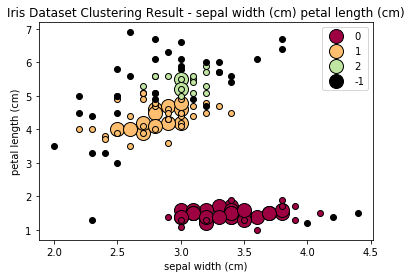

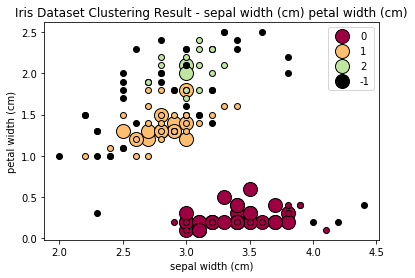

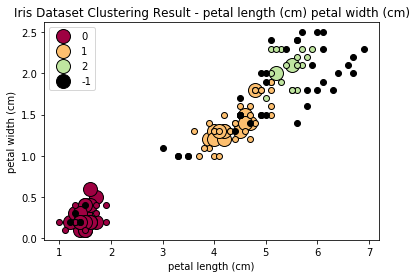

eps = 0.55; min_samples = 17
Number of clusters: 3
Clustering result:
black(-1): outliers
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1 -1  2 -1  2 -1 -1 -1 -1 -1  2 -1  2 -1 -1  2  2 -1 -1 -1  2 -1 -1  1  2
 -1  1  1  2 -1 -1 -1  2  1 -1 -1 -1  2  1  2  2  2 -1  2  2  2 -1  2 -1 -1]


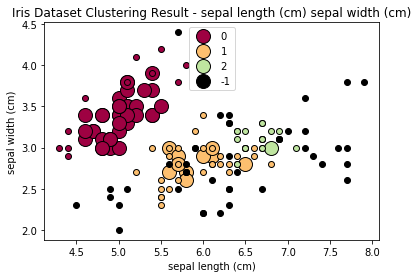

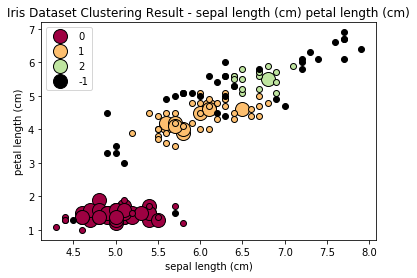

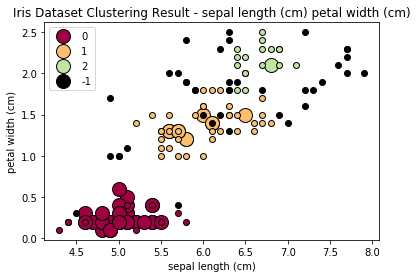

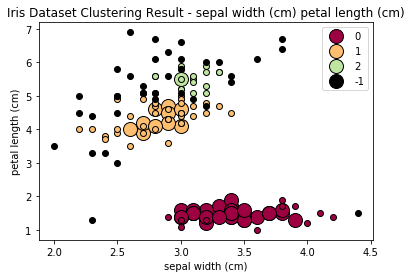

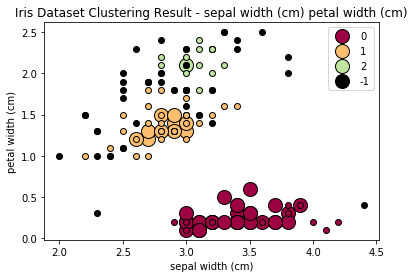

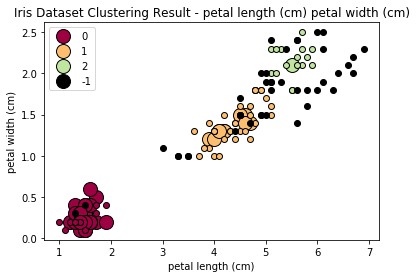

In [9]:
# Compute DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=12)
db = dbscan.fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("eps = 0.5; min_samples = 12")
print("Number of clusters:", n_clusters)
print("Clustering result:")
print("black(-1): outliers")
print(labels)
for i in range(0, 3):
    for j in range(i+1, 4):
        plotDBSCAN(i, j)

db = DBSCAN(eps=0.5, min_samples=13).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("eps = 0.5; min_samples = 13")
print("Number of clusters:", n_clusters)
print("Clustering result:")
print("black(-1): outliers")
print(labels)
for i in range(0, 3):
    for j in range(i+1, 4):
        plotDBSCAN(i, j)
        
db = DBSCAN(eps=0.55, min_samples=17).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("eps = 0.55; min_samples = 17")
print("Number of clusters:", n_clusters)
print("Clustering result:")
print("black(-1): outliers")
print(labels)
for i in range(0, 3):
    for j in range(i+1, 4):
        plotDBSCAN(i, j)


#### 3.1.4 Gaussian Mixture

**Keterangan parameter penting yang dapat digunakan:**
- **n_components** : jumlah komponen mixture
- **covariance_type** : jenis kovariansi (full(default)/tied/diag/spherical)
- **tol** : threshold konvergensi batas bawah average gain

In [10]:
# plot function
# modified from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
colors = ['navy', 'turquoise', 'darkorange']
def make_ellipses(gmm, n_components, ax, i, j):
    for n, color in enumerate(colors):
        covariances = gmm.covariances_[n][:n_components-1, :n_components-1]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :n_components-1], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

Clustering result:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


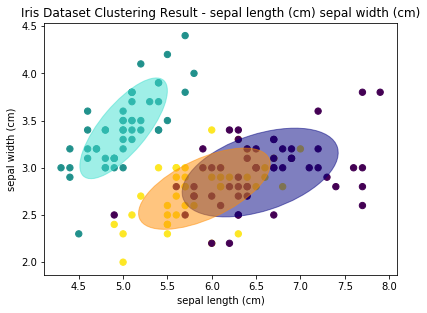

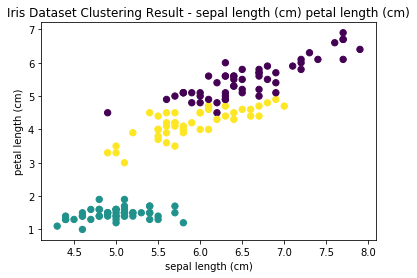

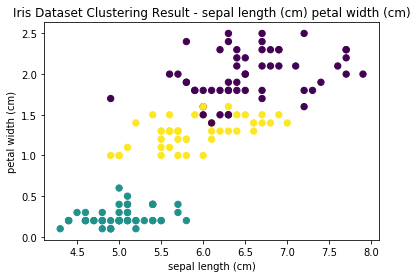

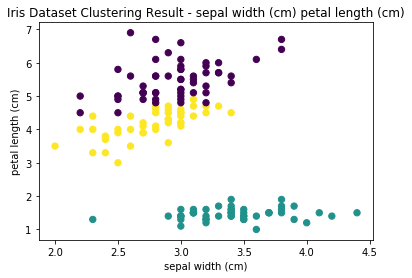

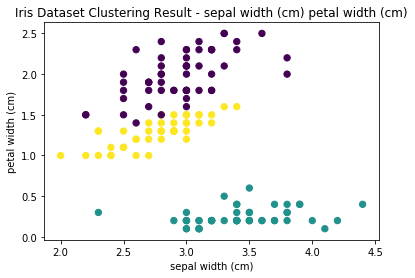

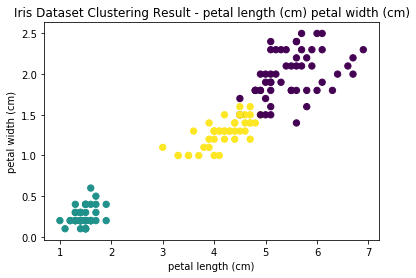

In [11]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x)
labels = gmm.predict(x)
print("Clustering result:")
print(labels)

plt.figure(figsize=(5, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

h = plt.subplot(2, 1, 1)
make_ellipses(gmm, 3, h, i, j)
for i in range(0, 3):
    for j in range(i+1, 4):
        setLabelAndTitle(i, j)
        plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
        plt.scatter(x[:, i], x[:, j], c=labels, s=40, cmap='viridis');
        plt.show()

#### 3.1.5 K-Medoids

*Library* yang digunakan untuk *clustering* dengan k-medoids adalah **pyclustering**.

**Keterangan parameter penting yang dapat digunakan: (selain data)**
- **initial_index_medoids**	: *index instance* medoid awal, ditentukan secara manual oleh pengguna
- **tolerance** : toleransi konvergensi

Clustering result:
Medoids: [7, 55, 112]
[[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [55, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 119, 121, 123, 126, 127, 133, 138, 142, 149], [112, 50, 52, 76, 77, 86, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 114, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148]]


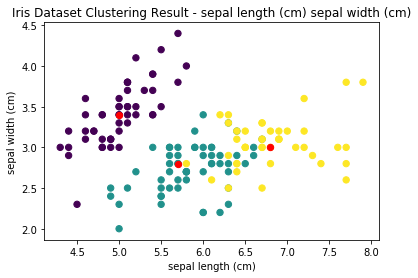

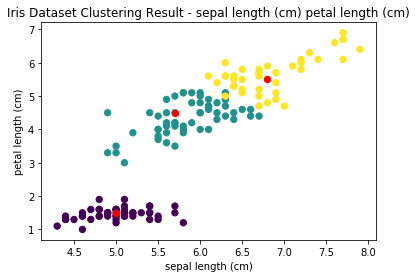

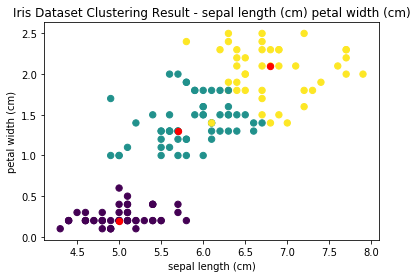

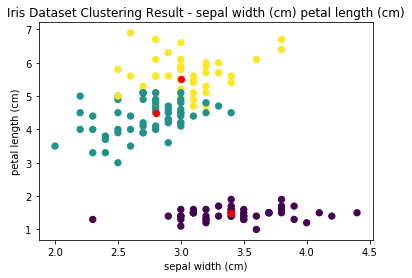

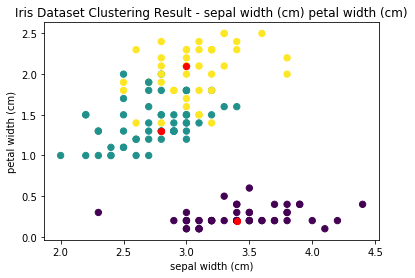

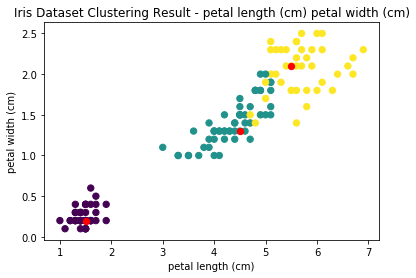

In [12]:
kmedoids_instance = kmedoids(x,[20, 70, 111]);
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print("Clustering result:")
print("Medoids:", medoids)
print(clusters)

# plot cluster
labels = [0 for i in range(0,150)]
for i in range(0, len(clusters)):
    for j in range (0, len(clusters[i])):
        labels[clusters[i][j]] = i

for i in range(0, 3):
    for j in range(i+1, 4):
        setLabelAndTitle(i, j)
        plt.scatter(x[:, i], x[:, j], c=labels, s=40, cmap='viridis')
        for l in range(0, len(medoids)):
            plt.scatter(x[medoids[l], i], x[medoids[l], j], c='red', s=40)
            
        plt.show()

#### 3.1.6 Graph Clustering

Library yang digunakan untuk graph clustering adalah **mst_clustering** yang dibuat compatible dengan scikit-learn (https://github.com/jakevdp/mst_clustering/).

**Keterangan parameter penting yang dapat digunakan:**
- **cutoff_scale** : panjang edge graf yang akan dipotong
- **min_cluster_size** : jumlah minimum instance dalam satu cluster

Iris Dataset Clustering Result - sepal length (cm) sepal width (cm)


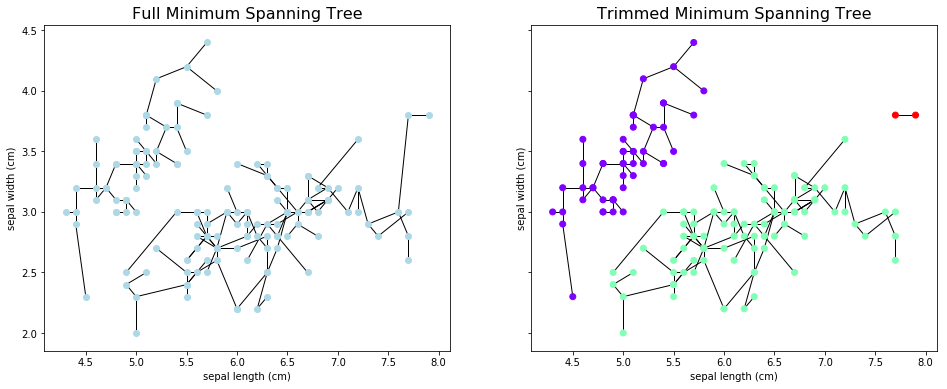

Iris Dataset Clustering Result - sepal length (cm) petal length (cm)


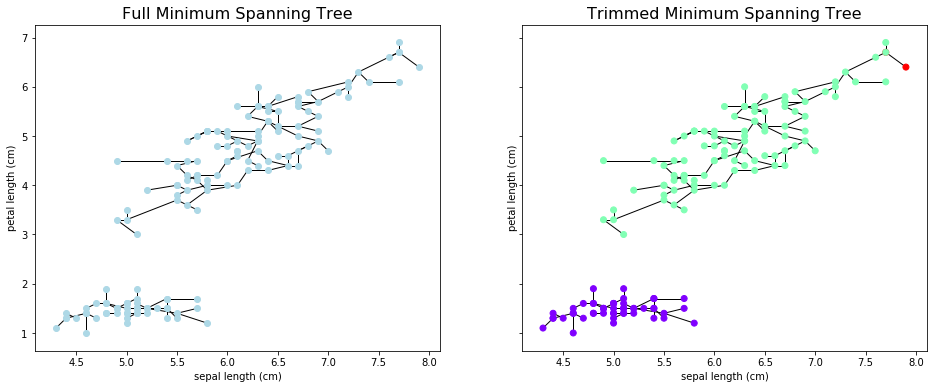

Iris Dataset Clustering Result - sepal length (cm) petal width (cm)


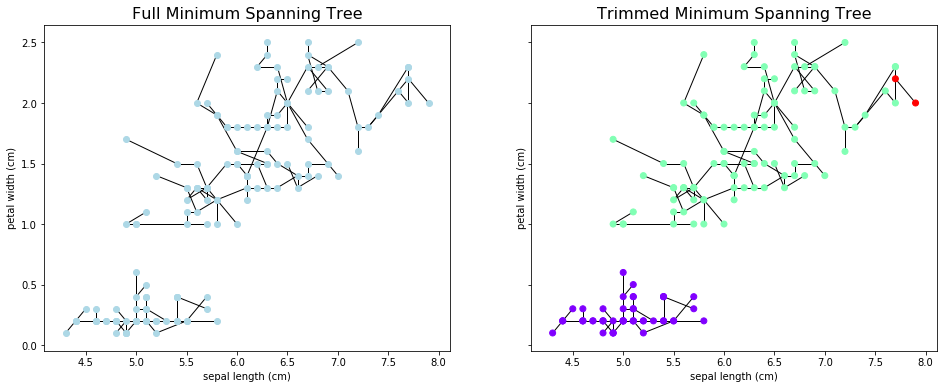

Iris Dataset Clustering Result - sepal width (cm) petal length (cm)


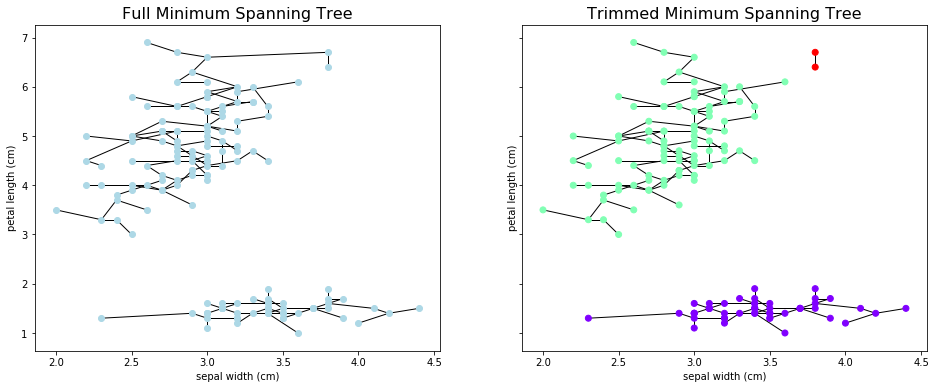

Iris Dataset Clustering Result - sepal width (cm) petal width (cm)


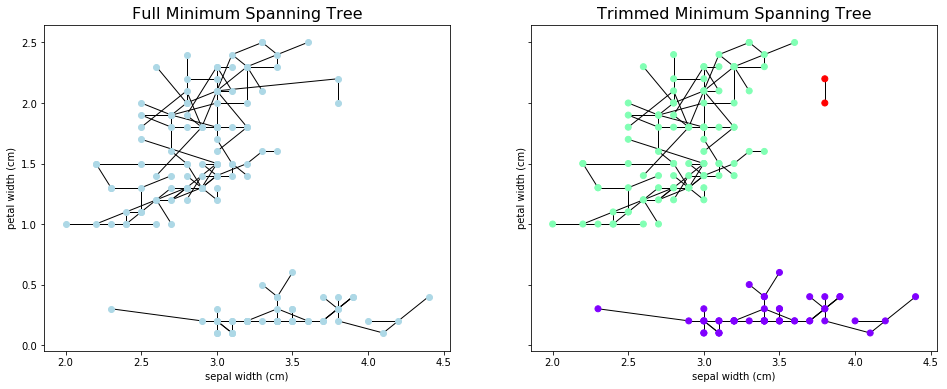

Iris Dataset Clustering Result - petal length (cm) petal width (cm)


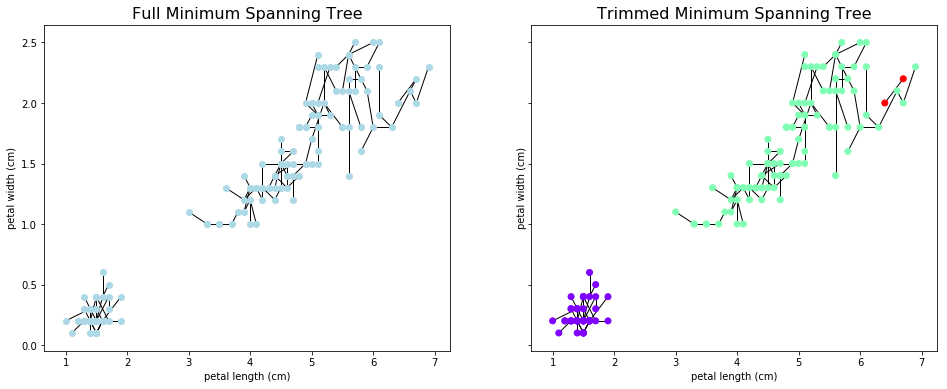

In [13]:
def plot_mst(model, i, j, is_tennis=False, cmap='rainbow'):
    if(is_tennis):
        print('Play Tennis Dataset Clustering Result - ' 
              + play_tennis_attributes[i] + ' ' + play_tennis_attributes[j])
    else:
        print('Iris Dataset Clustering Result - ' 
              + iris_dataset['feature_names'][i] + ' ' + iris_dataset['feature_names'][j])
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[i], segments[j], '-k', zorder=1, lw=1)
        axi.scatter(X[:, i], X[:, j], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);
    if(is_tennis):
        ax[0].set_xlabel(play_tennis_attributes[i])
        ax[0].set_ylabel(play_tennis_attributes[j])
        ax[1].set_xlabel(play_tennis_attributes[i])
        ax[1].set_ylabel(play_tennis_attributes[j])
    else:
        ax[0].set_xlabel(iris_dataset['feature_names'][i])
        ax[0].set_ylabel(iris_dataset['feature_names'][j])
        ax[1].set_xlabel(iris_dataset['feature_names'][i])
        ax[1].set_ylabel(iris_dataset['feature_names'][j])
    plt.show()
    
graph_clustering = MSTClustering(cutoff_scale=0.75)
graph_clustering.fit(x)
for i in range(0, 3):
    for j in range(i+1, 4):
        plot_mst(graph_clustering, i, j)

#### 3.1.7 Grid Clustering (BANG Clustering)

*Library* yang digunakan untuk *clustering* dengan grid clustering adalah **pyclustering** yaitu dengan menggunakan modul BANG clustering.

**Keterangan parameter penting yang dapat digunakan: (selain data)**
- **levels**	: jumlah pembagian yang dilakukan dalam setiap grid

Clustering result:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [117, 131, 109], [41]]


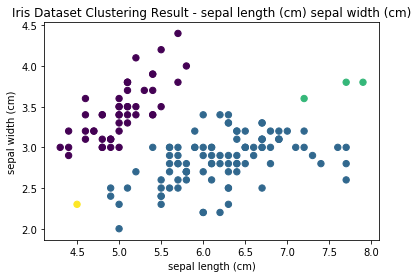

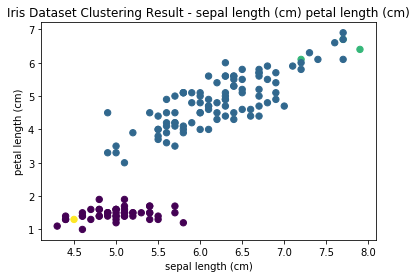

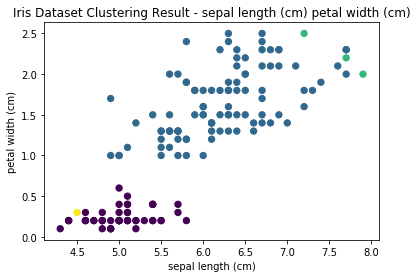

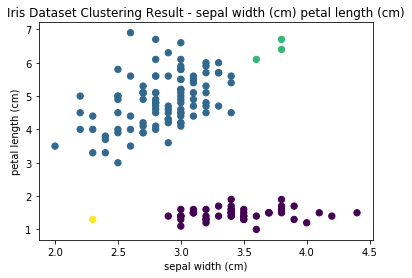

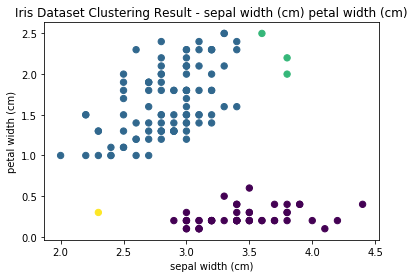

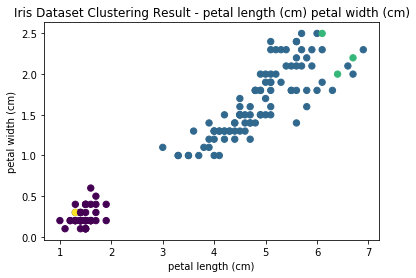

In [14]:
# convert numpy array to list
list_dataset = x.tolist()

# clustering using BANG
bang_instance = bang(list_dataset, 14)
bang_instance.process()

clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()

labels = [0 for i in range(0,150)]
for i in range(0, len(clusters)):
    for j in range (0, len(clusters[i])):
        labels[clusters[i][j]] = i
print("Clustering result:")
print(clusters)

for i in range(0, 3):
    for j in range(i+1, 4):
        setLabelAndTitle(i, j)
        plt.scatter(x[:, i], x[:, j], c=labels, s=40, cmap='viridis')
        plt.show()

#### 3.1.8 Penyimpanan dan Pembacaan Model/Hipotesis pada File Eksternal
**1. Penyimpanan Model/Hipotesis**

In [15]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(agglomerative, 'agglomerative_model.pkl')
joblib.dump(db, 'dbscan_model.pkl')
joblib.dump(gmm, 'gaussian_mixture_model.pkl')
joblib.dump(graph_clustering, 'graph_clustering_model.pkl')

with open('kmedoids_model', "wb") as f:
    dill.dump(kmedoids_instance, f)

with open('bang_model', "wb") as f:
    dill.dump(bang_instance, f)

**2. Pembacaan Model/Hipotesis**

In [16]:
kmeans_model = joblib.load('kmeans_model.pkl')
agglomerative_model = joblib.load('agglomerative_model.pkl')
dbscan_model = joblib.load('dbscan_model.pkl')
gaussian_mixture_model = joblib.load('gaussian_mixture_model.pkl')
graph_clustering_model = joblib.load('graph_clustering_model.pkl')

kmedoids_model = dill.load(open('kmedoids_model', "rb"))
bang_model = dill.load(open('bang_model', "rb"))

#### 3.1.9 Assignment Cluster Instance Baru dengan Model dari File Eksternal
**1. Pembuatan Instance Baru**

In [17]:
test_instance = [[4.8,  3.1 ,  1.1,  0.4]]

new_dataset = np.append(x, test_instance, axis=0)

# convert numpy array to list for BANG clustering
new_list_dataset = new_dataset.tolist()

**2. Assignment Cluster Instance Baru**  
**a. K-Means**

In [18]:
kmeans_cluster_prediction = kmeans_model.predict(test_instance)
print("New instance cluster:", kmeans_cluster_prediction[0])

New instance cluster: 1


**b. Agglomerative Clustering**

In [19]:
agglomerative_prediction = agglomerative_model.fit_predict(new_dataset)
print("New instance cluster:", agglomerative_prediction[150])

New instance cluster: 1


**c. DBSCAN**

In [20]:
dbscan_prediction = dbscan_model.fit_predict(new_dataset)
print("New instance cluster:", dbscan_prediction[150])

New instance cluster: 0


**d. Gaussian Mixture**

In [21]:
gmm_cluster_prediction = gaussian_mixture_model.predict(test_instance)
print("New instance cluster:", gmm_cluster_prediction[0])

New instance cluster: 1


**e. Graph Clustering**

In [22]:
graph_clustering_prediction = graph_clustering_model.fit_predict(new_dataset)
print("New instance cluster:", graph_clustering_prediction[150])

New instance cluster: 0


**f. K-Medoids**

In [23]:
kmedoids_instance = kmedoids(new_dataset,[20, 70, 111]);
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print("Medoids:",medoids)
for i in range(0, len(clusters)):
    if 150 in clusters[i]:
        print("New instance cluster:", i)
        break

Medoids: [7, 55, 112]
New instance cluster: 0


**g. Grid Clustering (BANG)**

In [24]:
bang_model = bang(new_list_dataset, 14)
bang_model.process()

clusters = bang_model.get_clusters()
noise = bang_model.get_noise()
directory = bang_model.get_directory()
dendrogram = bang_model.get_dendrogram()

for i in range(0, len(clusters)):
    if 150 in clusters[i]:
        print("New instance cluster:", i)
        break

New instance cluster: 0


### 3.2 Clustering Dataset Play Tennis

#### 3.2.1 K-Means

Clustering result:
[0 0 0 1 1 1 1 0 0 1 0 0 0 1]


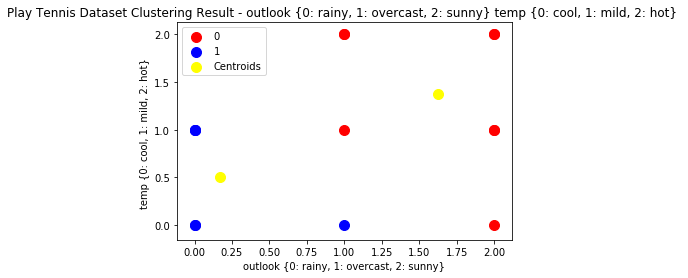

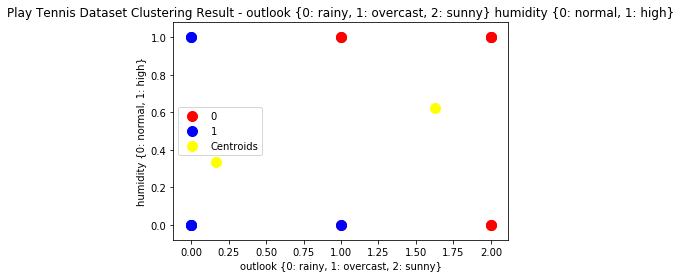

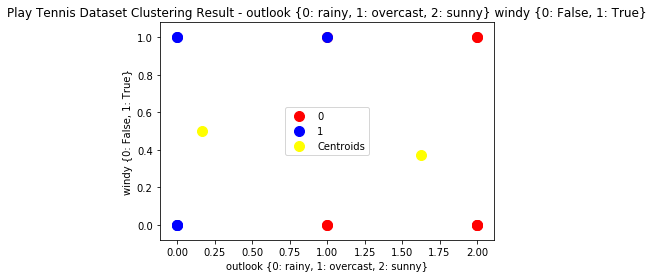

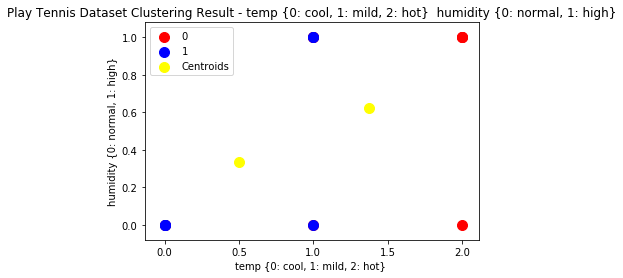

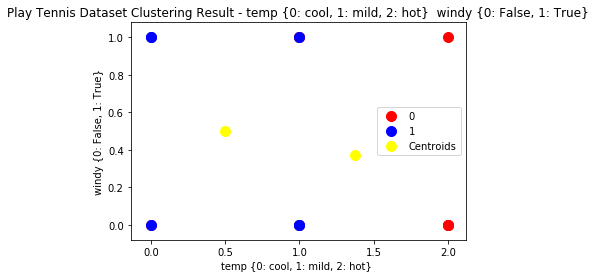

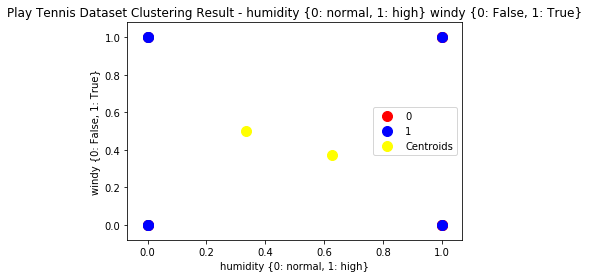

In [25]:
# K-Means
x = tenis_data_nparray
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
clustering_result = kmeans.fit_predict(x)
print("Clustering result:")
print(clustering_result)

plotClusteringResult(clustering_result, 1, True)
plt.show()

#### 3.2.2 Agglomerative Clustering

Clustering result:
[0 0 0 1 1 1 1 0 0 1 0 1 0 1]


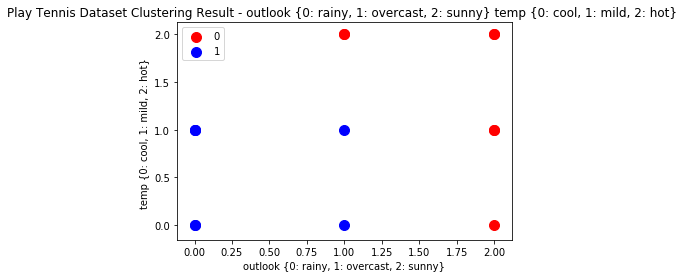

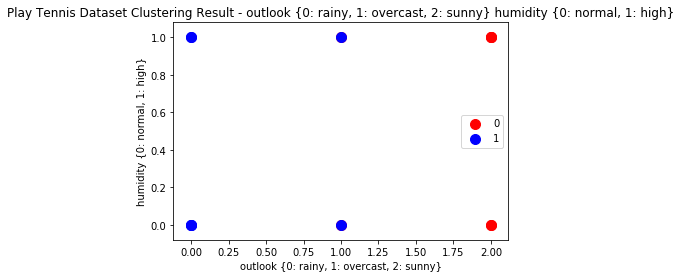

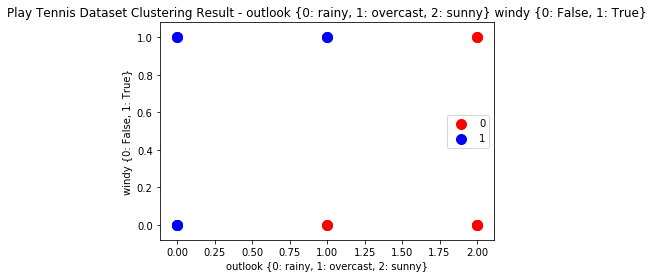

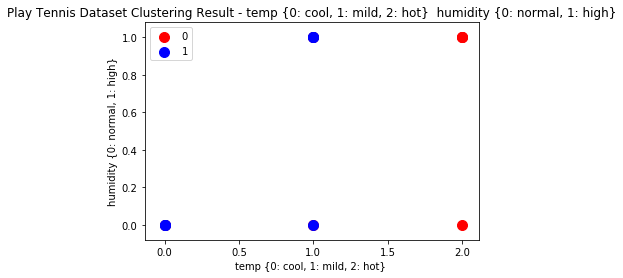

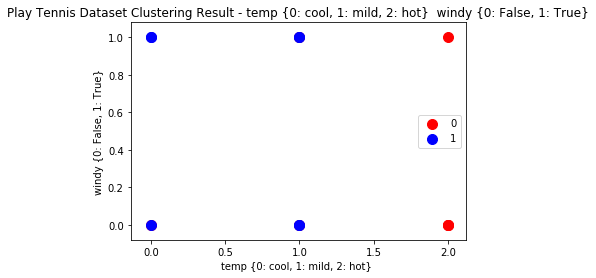

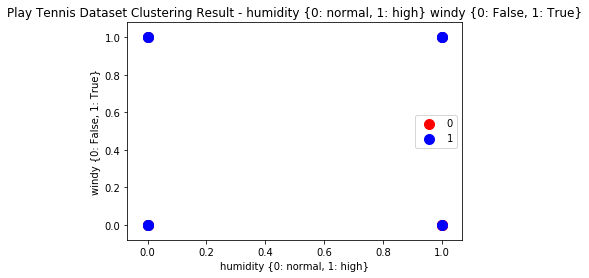

In [26]:
agglomerative = AgglomerativeClustering(n_clusters = 2)
agglomerative.fit(x)
clustering_result = agglomerative.fit_predict(x)
print("Clustering result:")
print(clustering_result)

plotClusteringResult(clustering_result, 0, True)
plt.show()

#### 3.2.3 DBSCAN

Clustering result:
[ 0  0  0  1  1  1  1  0 -1  1 -1  1  0  1]
eps = 1; min_samples = 2


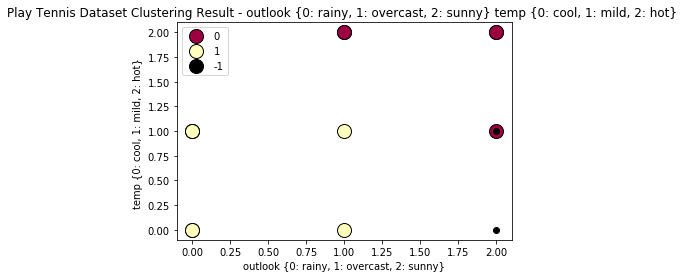

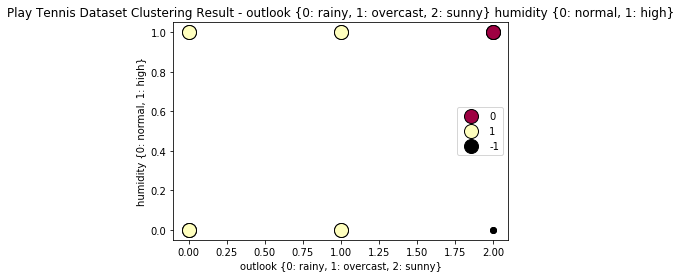

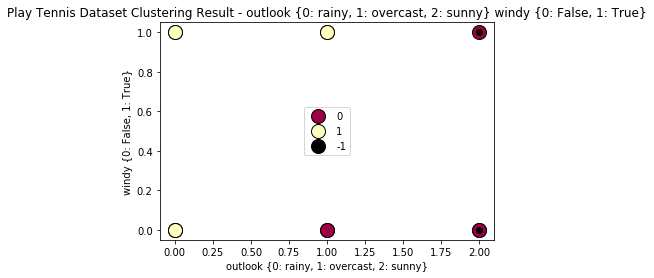

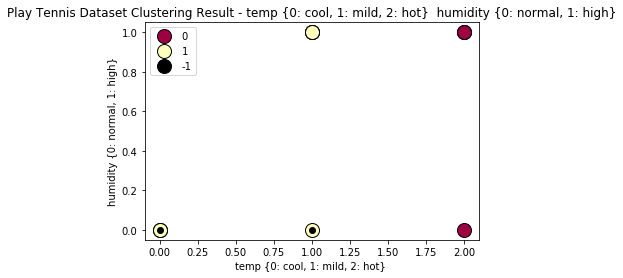

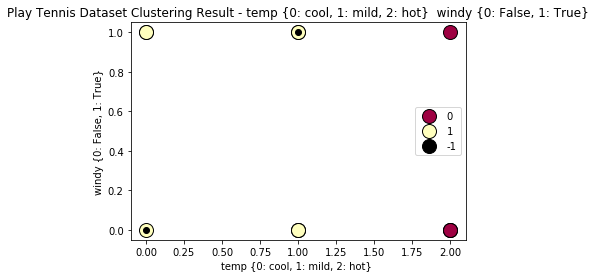

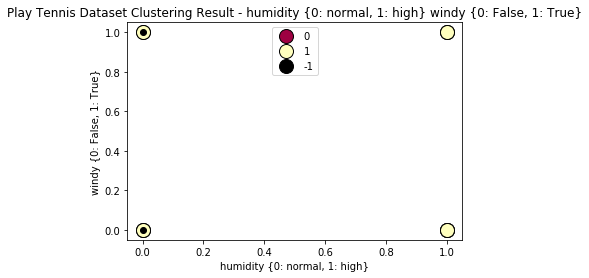

In [27]:
dbscan = DBSCAN(eps=1, min_samples=2)
db = dbscan.fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("Clustering result:")
print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("eps = 1; min_samples = 2")
for i in range(0, 3):
    for j in range(i+1, 4):
        plotDBSCAN(i, j, True)

#### 3.2.4 Gaussian Mixture

Clustering result:
[0 0 0 1 1 1 1 0 0 1 0 1 0 1]


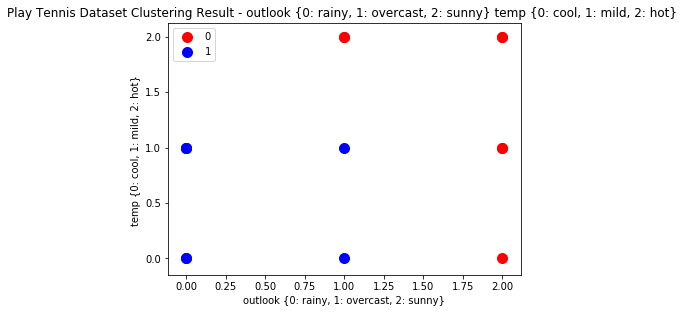

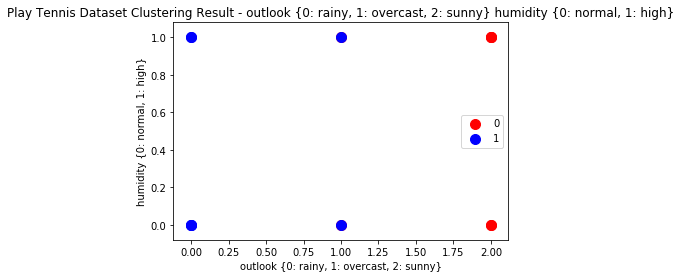

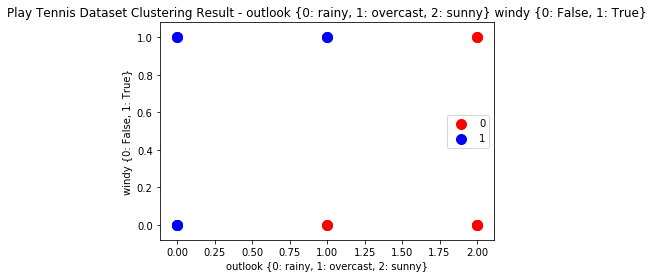

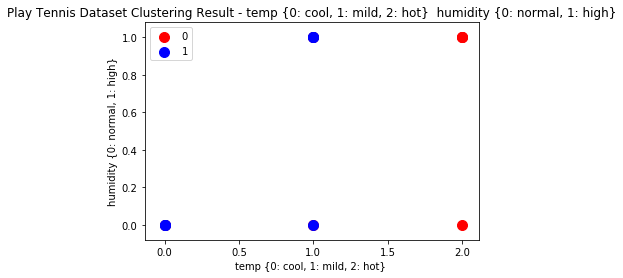

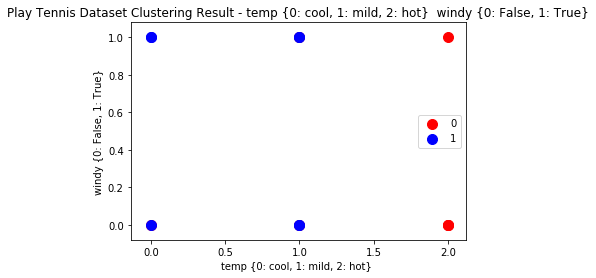

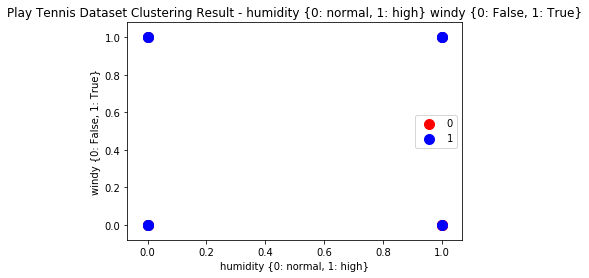

In [28]:
gmm = GaussianMixture(n_components=2)
gmm.fit(x)
labels = gmm.predict(x)

plt.figure(figsize=(5, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
# gmm.covariances_

print("Clustering result:")
print(labels)
h = plt.subplot(2, 1, 1)
# make_ellipses(gmm, 2, h)
# plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

# plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');
plotClusteringResult(labels, 0, True)
plt.show()

#### 3.2.5 K-Medoids

[[2, 0, 1, 3, 7, 9, 11, 12, 13], [6, 4, 5, 8, 10]]
[2, 6]


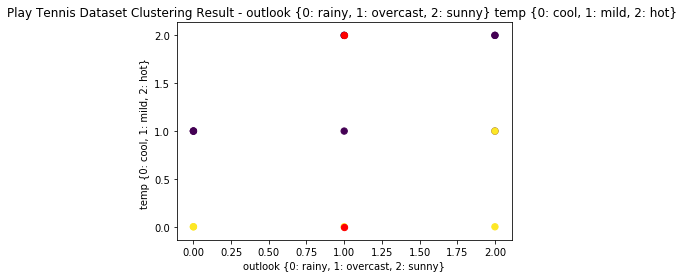

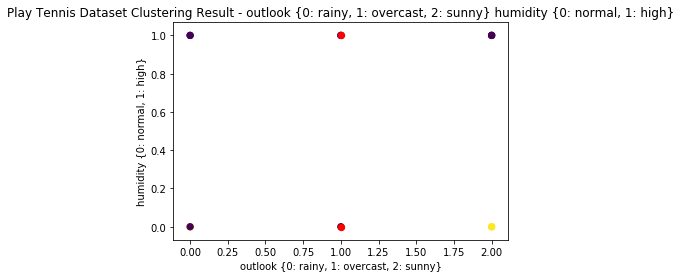

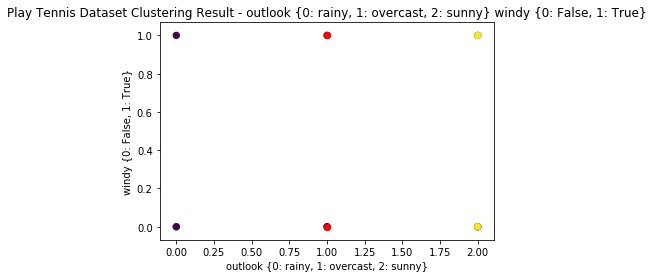

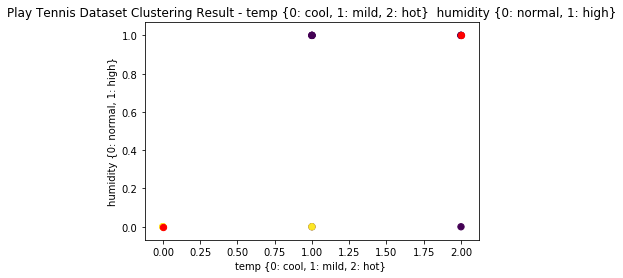

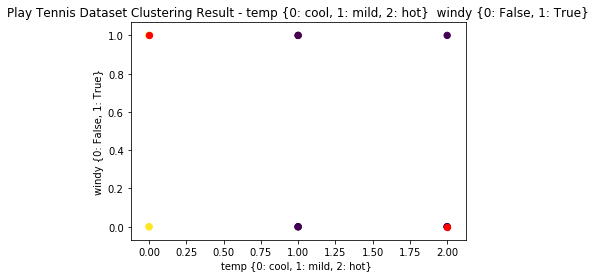

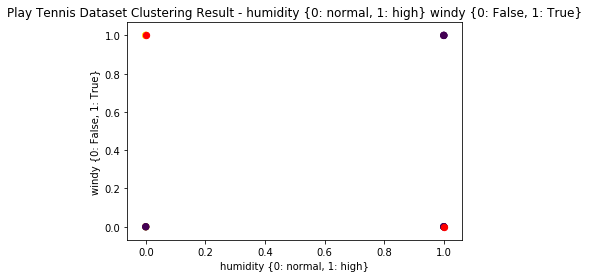

In [29]:
kmedoids_instance = kmedoids(x,[1, 10]);
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(clusters)
print(medoids)

# plot cluster
labels = [0 for i in range(0,14)]
for i in range(0, len(clusters)):
    for j in range (0, len(clusters[i])):
        labels[clusters[i][j]] = i
            
for i in range(0, 3):
    for j in range(i+1, 4):
        setLabelAndTitle(i, j, True)
        plt.scatter(x[:, i], x[:, j], c=labels, s=40, cmap='viridis')
        for l in range(0, len(medoids)):
            plt.scatter(x[medoids[l], i], x[medoids[l], j], c='red', s=40)
            
        plt.show()

#### 3.2.6 Graph Clustering

Play Tennis Dataset Clustering Result - outlook {0: rainy, 1: overcast, 2: sunny} temp {0: cool, 1: mild, 2: hot} 


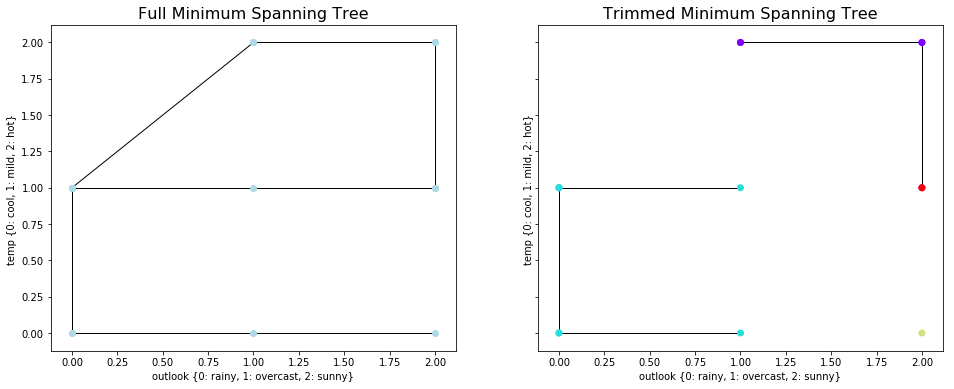

Play Tennis Dataset Clustering Result - outlook {0: rainy, 1: overcast, 2: sunny} humidity {0: normal, 1: high}


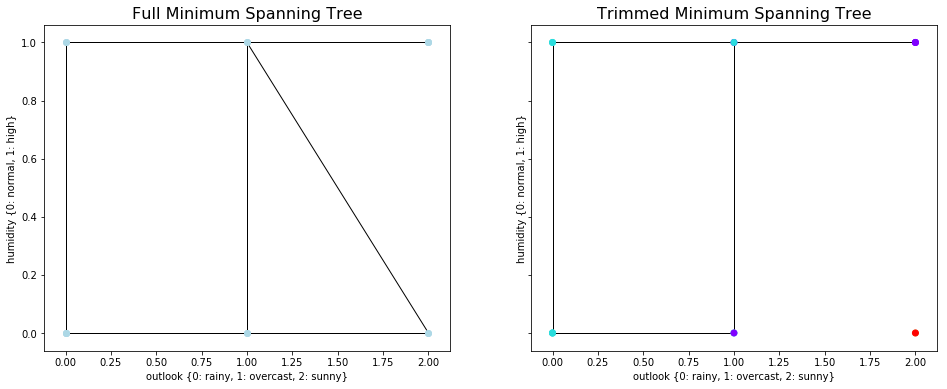

Play Tennis Dataset Clustering Result - outlook {0: rainy, 1: overcast, 2: sunny} windy {0: False, 1: True}


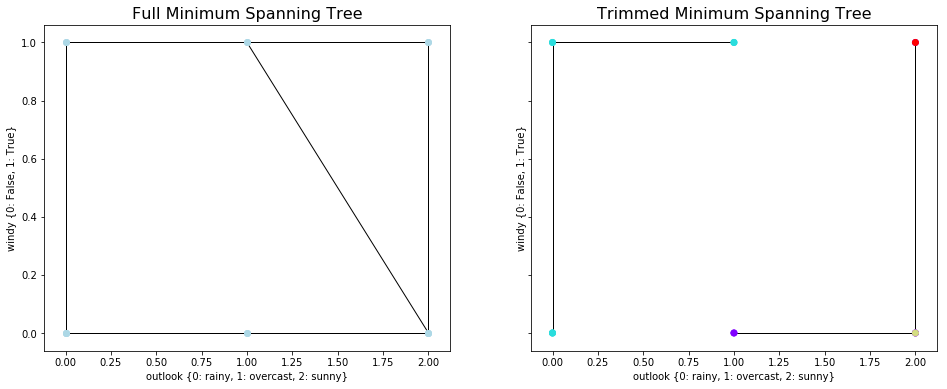

Play Tennis Dataset Clustering Result - temp {0: cool, 1: mild, 2: hot}  humidity {0: normal, 1: high}


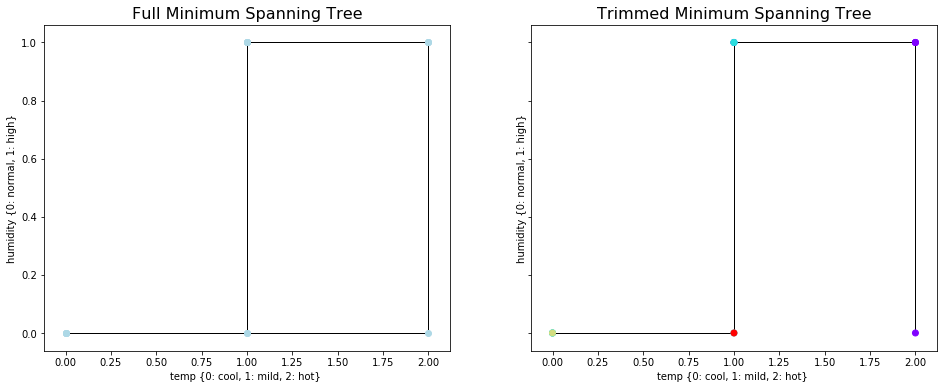

Play Tennis Dataset Clustering Result - temp {0: cool, 1: mild, 2: hot}  windy {0: False, 1: True}


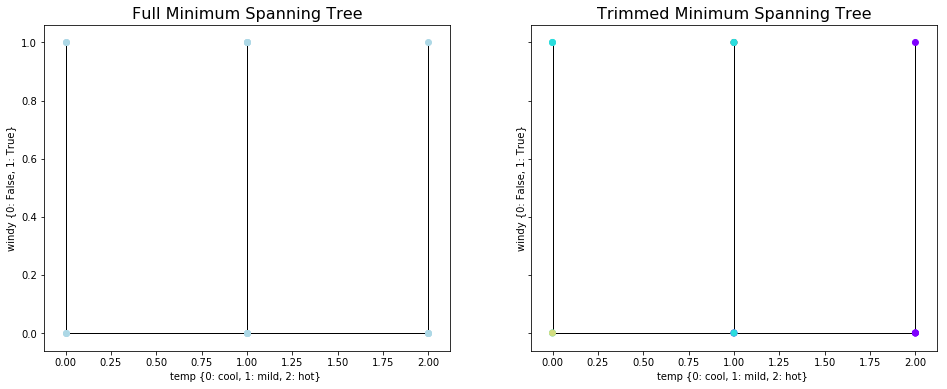

Play Tennis Dataset Clustering Result - humidity {0: normal, 1: high} windy {0: False, 1: True}


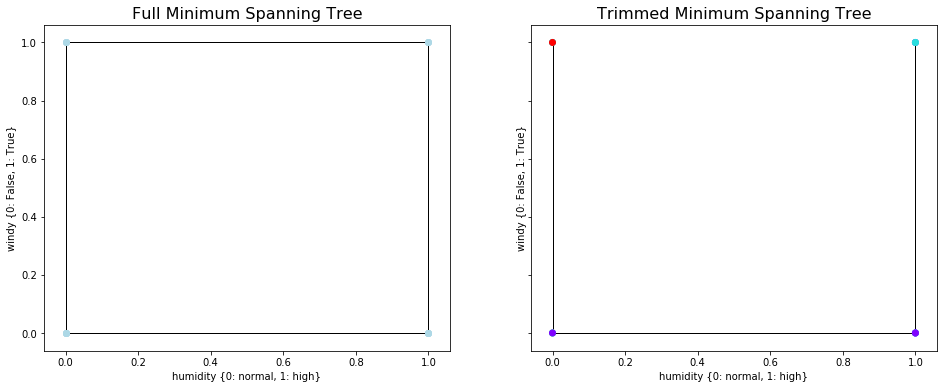

In [30]:
graph_clustering = MSTClustering(cutoff_scale=1.4)
graph_clustering.fit(x)
for i in range(0, 3):
    for j in range(i+1, 4):
        plot_mst(graph_clustering, i, j, True)

#### 3.2.7 Grid Clustering (BANG Clustering)

Clustering result:
[[0, 1, 2, 3, 7, 11, 13], [4, 5, 6, 8, 9, 10, 12]]


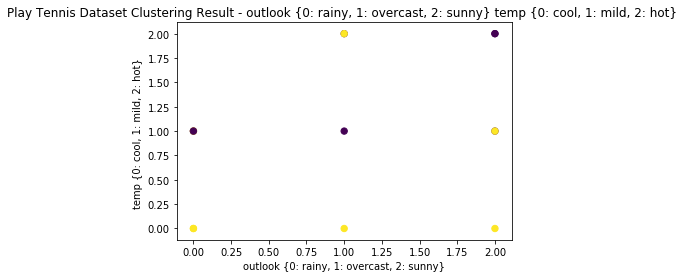

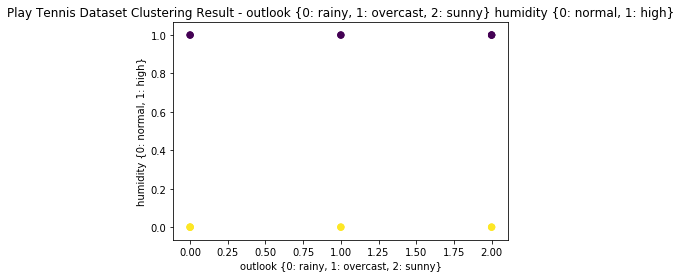

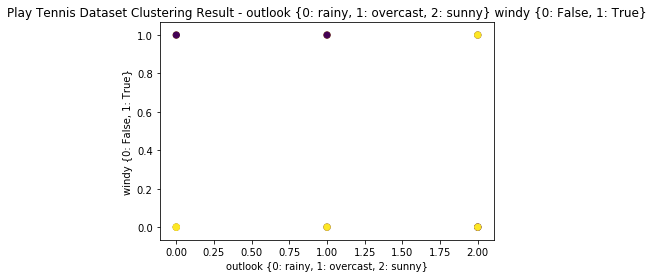

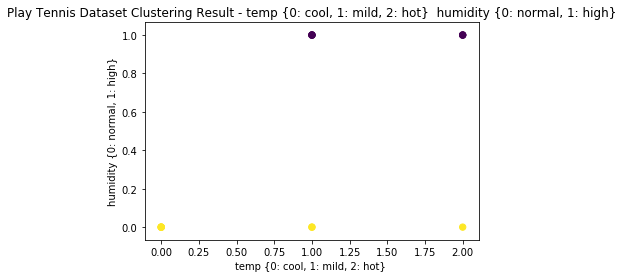

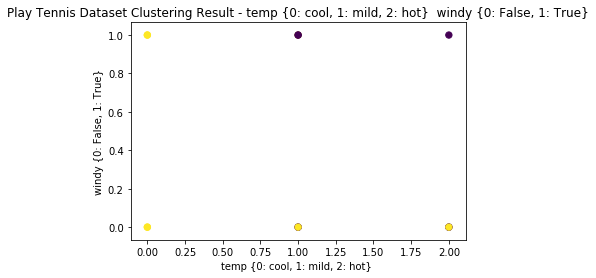

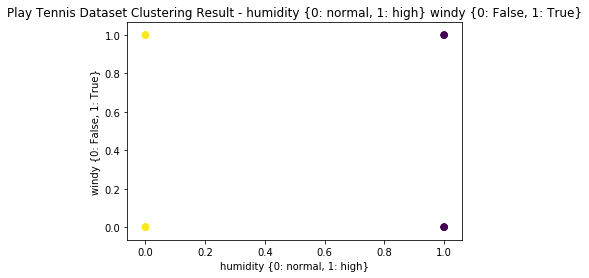

In [31]:
bang_instance = bang(tenis_data_list, 7)
bang_instance.process()

clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()

labels = [0 for i in range(0,14)]
for i in range(0, len(clusters)):
    for j in range (0, len(clusters[i])):
        labels[clusters[i][j]] = i
print("Clustering result:")
print(clusters)

for i in range(0, 3):
    for j in range(i+1, 4):
        setLabelAndTitle(i, j, True)
        plt.scatter(x[:, i], x[:, j], c=labels, s=40, cmap='viridis')
        plt.show()

#### 3.2.8 Penyimpanan dan Pembacaan Model/Hipotesis pada File Eksternal
**1. Penyimpanan Model/Hipotesis**

In [32]:
joblib.dump(kmeans, 'tennis_kmeans_model.pkl')
joblib.dump(agglomerative, 'tennis_agglomerative_model.pkl')
joblib.dump(db, 'tennis_dbscan_model.pkl')
joblib.dump(gmm, 'tennis_gaussian_mixture_model.pkl')
joblib.dump(graph_clustering, 'tennis_graph_clustering_model.pkl')

with open('tennis_kmedoids_model', "wb") as f:
    dill.dump(kmedoids_instance, f)

with open('tennis_bang_model', "wb") as f:
    dill.dump(bang_instance, f)

**2. Pembacaan Model/Hipotesis**

In [33]:
kmeans_model = joblib.load('tennis_kmeans_model.pkl')
agglomerative_model = joblib.load('tennis_agglomerative_model.pkl')
dbscan_model = joblib.load('tennis_dbscan_model.pkl')
gaussian_mixture_model = joblib.load('tennis_gaussian_mixture_model.pkl')
graph_clustering_model = joblib.load('tennis_graph_clustering_model.pkl')

kmedoids_model = dill.load(open('tennis_kmedoids_model', "rb"))
bang_model = dill.load(open('tennis_bang_model', "rb"))

#### 3.2.9 Assignment Cluster Instance Baru dengan Model dari File Eksternal
**1. Pembuatan Instance Baru**

In [34]:
# sunny, cool, normal, True
test_instance = [[2, 0, 0, 1]]

new_dataset = np.append(x, test_instance, axis=0)
print(new_dataset[14])

# convert numpy array to list for BANG clustering
new_list_dataset = new_dataset.tolist()

[2 0 0 1]


**2. Assignment Cluster Instance Baru**  
**a. K-Means**

In [35]:
kmeans_cluster_prediction = kmeans_model.predict(test_instance)
print("New instance cluster:", kmeans_cluster_prediction[0])

New instance cluster: 0


**b. Agglomerative Clustering**

In [36]:
agglomerative_prediction = agglomerative_model.fit_predict(new_dataset)
print("New instance cluster:", agglomerative_prediction[14])

New instance cluster: 0


**c. DBSCAN**

In [37]:
dbscan_prediction = dbscan_model.fit_predict(new_dataset)
print("New instance cluster:", dbscan_prediction[14])

New instance cluster: 1


**d. Gaussian Mixture**

In [38]:
gmm_cluster_prediction = gaussian_mixture_model.predict(test_instance)
print("New instance cluster:", gmm_cluster_prediction[0])

New instance cluster: 0


**e. Graph Clustering**

In [39]:
graph_clustering_prediction = graph_clustering_model.fit_predict(new_dataset)
print("New instance cluster:", graph_clustering_prediction[14])

New instance cluster: 1


**f. K-Medoids**

In [40]:
kmedoids_instance = kmedoids(new_dataset,[1, 10]);
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

for i in range(0, len(clusters)):
    if 14 in clusters[i]:
        print("New instance cluster:", i)
        break

New instance cluster: 1


**g. Grid Clustering (BANG)**

In [41]:
bang_model = bang(new_list_dataset, 7)
bang_model.process()

clusters = bang_model.get_clusters()
noise = bang_model.get_noise()
directory = bang_model.get_directory()
dendrogram = bang_model.get_dendrogram()
clusters

for i in range(0, len(clusters)):
    if 14 in clusters[i]:
        print("New instance cluster:", i)
        break

New instance cluster: 1


## 4. Sumber
[1] http://scikit-learn.org/stable/modules/clustering.html  
[2] http://nbviewer.jupyter.org/github/jakevdp/mst_clustering/blob/master/MSTClustering.ipynb  
[3] https://codedocs.xyz/annoviko/pyclustering/index.html  